In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1]
    
    # very slow
    ret1 = np.zeros((M, K))
    for n in range(N):
        for m in range(M):
            for k in range(K):
                ret1[m,k] += (T[n,k] -Y[n,k])*Z[n,m]
    # slow
    ret2 = np.zeros((M, K))
    for n in range(N):
        for k in range(k):
            ret2[:,k] += (T[n,k] -Y[n,k])*Z[n,:]
    # still slow
    ret3 = np.zeros((M, K))
    for n in range(N):
        ret3[:,k] += np.outer(Z[n], T[n] -Y[n] )
    return ret3
        
def derivative_w1(X, Z, T, Y, W2):                                              
    N, D = X.shape                                                              
    M, K = W2.shape                                                             
                                                                                
    # slow way first                                                            
    ret1 = np.zeros((X.shape[1], M))                                          
    for n in range(N):                                                       
        for k in range(K):                                                   
            for m in range(M):                                               
                for d in range(D):                                           
                    ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]                            
                                                                                
    return ret1

In [3]:
def derivative_w2(Z, T, Y):                                                     
    return Z.T.dot(T - Y)

def derivative_w1(X, W2, Z, T, Y):
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)                                        
    return X.T.dot(dZ)

def derivative_b2(T, Y):                                                        
    return (T - Y).sum(axis=0)                                                  
                                                                                                                                                          
def derivative_b1(W2, Z, T, Y):                                                 
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)                        
                                                                                                                                                          
def cost(T, Y):
    return (T*np.log(Y)).sum()

In [4]:
def sigmoid(a):
    return 1.0 / ( 1.0 + np.exp(-a))

def softmax(a):                                                                 
    expA = np.exp(a)                                                            
    return expA / expA.sum(axis=1, keepdims=True)
                  
def forward(X, W1, b1, W2, b2):
    """ Sigmoid non-linearity in Hidden layers. """
    # value at the hidden layer
    #Z = sigmoid( X.dot(W1)+b1 )
    Z = np.tanh( X.dot(W1)+b1 )
    # softmax at the next layer
    Y = softmax( Z.dot(W2)+b2 )
    return Y, Z

def classification_rate(target_labels, predicted_labels):
    return np.mean(target_labels==predicted_labels)

def scatter(x, y):
    plt.scatter(x[:,0], x[:,1], c=y, s=100, alpha=0.5)
    plt.show();

In [5]:
Nclass = 500 # 500 samples per class
D = 2 # dimensions
M = 3 # Number of Hidden layers
K = 3 # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# 3 gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

# create labels
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# Indicator matrix
T = np.zeros((N,K))
for i in range(N):
    T[i, Y[i]] = 1

cost: -1414.6228951622675,	classification_rate:0.526
cost: -1449.2401282365201,	classification_rate:0.6686666666666666
cost: -1206.3563047642097,	classification_rate:0.6806666666666666
cost: -1066.3585634209367,	classification_rate:0.698
cost: -1250.3196693250547,	classification_rate:0.5326666666666666
cost: -1251.1821987413791,	classification_rate:0.544
cost: -1187.1536711534911,	classification_rate:0.6013333333333334
cost: -1178.429545569989,	classification_rate:0.45
cost: -1114.2117642141047,	classification_rate:0.6086666666666667
cost: -1047.618733184952,	classification_rate:0.646


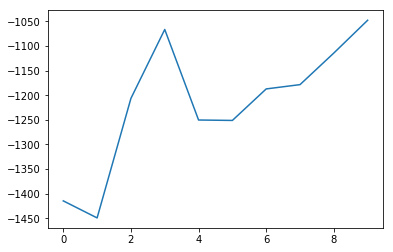

In [6]:
costs = []
epochs = 100000
learning_rate = 1.0e-7
for epoch in range(epochs):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch%10000==0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print( "cost: {},\tclassification_rate:{}".format(c, r))
        costs.append(c)
    # this is gradient ASCENT, not DESCENT                                  
    # be comfortable with both!                                             
    # oldW2 = W2.copy()                                                     
    W2 += learning_rate * derivative_w2(hidden, T, output)                  
    b2 += learning_rate * derivative_b2(T, output)                          
    W1 += learning_rate * derivative_w1(X, W2, hidden, T, output)           
    b1 += learning_rate * derivative_b1(W2, hidden, T, output)
plt.plot(costs)                                                             
plt.show();